# Описание проекта

В рамках проекта, я с позиции маркетингового аналитика буду изучать проблему развлекательного приложения Procrastinate Pro+.
Проблема состоит в том, что компания последние несколько месяцев терпит убытки, несмотря на огромные вложения в рекламу. Передо мной стоит задача - разобраться в причинах и помочь компании выйти в плюс.

В ходе исследования мне предстоит изучить:
- откуда приходят пользователи и какими устройствами они пользуются,
- сколько стоит привлечение пользователей из различных рекламных каналов;
- сколько денег приносит каждый клиент,
- когда расходы на привлечение клиента окупаются,
- какие факторы мешают привлечению клиентов.

Своё исследование я буду проводить в несколько этапов:
1. Подготовка данных
2. Составление метрик LTV, ROI, удержания и конверсии.
3. Исследовательский анализ данных
4. Исследование маркетинговых показателей
5. Оценка окупаемости рекламы
6. Вывод


#### Описание данных
В распоряжении мне предоставлено 3 датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.

Структура visits_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Region — страна пользователя,
- Device — тип устройства пользователя,
- Channel — идентификатор источника перехода,
- Session Start — дата и время начала сессии,
- Session End — дата и время окончания сессии.

Структура orders_info_short.csv:
- User Id — уникальный идентификатор пользователя,
- Event Dt — дата и время покупки,
- Revenue — сумма заказа.

Структура costs_info_short.csv:
- dt — дата проведения рекламной кампании,
- Channel — идентификатор рекламного источника,
- costs — расходы на эту кампанию.

<div class="alert alert-block alert-success">✔️
    

__Комментарий от ревьюера №1__


Отличная практика - расписывать цель и основные этапы своими словами (этот навык очень поможет на фильнальном проекте). 
</div>

## Шаг 1. Загрузите данные и подготовьте их к анализу

#### Загрузка данных

In [1]:
import pandas as pd
import warnings as wr
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pylab
from datetime import datetime, timedelta

In [2]:
# visits_info_short.csv - информация о посещениях сайта
try:
    visits = pd.read_csv('C:/Users/crugl/Downloads/visits_info_short.csv', sep=',')
except:
    visits = pd.read_csv('/datasets/visits_info_short.csv', sep=',')
    
# orders_info_short.csv - информация о заказах
try:
    orders = pd.read_csv('C:/Users/crugl/Downloads/orders_info_short.csv', sep=',')
except:
    orders = pd.read_csv('/datasets/orders_info_short.csv', sep=',')

# costs_info_short.csv - информация о расходах на рекламу
try:
    costs_info = pd.read_csv('C:/Users/crugl/Downloads/costs_info_short.csv', sep=',')
except:
    costs_info = pd.read_csv('/datasets/costs_info_short.csv', sep=',')

In [3]:
#pd.set_option('display.float_format', '{:.2f}'.format)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
wr.filterwarnings('ignore')

In [4]:
def processing (data):
    """
    Функция будет выводить информацию о явных дубликатах
    и пропусков в данных 
    """
    duplicated_sum = data.duplicated().sum()
    gap_sum = data.isna().sum()
    print(data.head())
    print()
    print(data.info())
    print()
    print('Количество явных дубликатов:', duplicated_sum)
    print('Количество пропусков:')
    print(gap_sum)

#### Предобработка данных

##### Датасет visits

In [5]:
processing(visits)

        User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null 

In [ ]:
visits.columns = visits.columns.str.lower().str.replace(' ', '_')

In [6]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']

In [7]:
# приведу данные в столбцах session_start и session_end к временному типу 
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [8]:
#for column in visits:
    #print('Уникальный значения столбца', column)
    #print(*visits[column].unique())
    #print()

##### Датасет orders

In [9]:
processing(orders)

        User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB
None

Количество явных дубликатов: 0
Количество пропусков:
User Id     0
Event Dt    0
Revenue     0
dtype: int64


In [10]:
# приведу название столбцов к общему виду
orders.columns = ['user_id', 'event_dt', 'revenue']

In [11]:
# приведу данные в столбцах event_dt к временному типу 
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

##### Датасет costs_info

In [12]:
processing(costs_info)

           dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB
None

Количество явных дубликатов: 0
Количество пропусков:
dt         0
Channel    0
costs      0
dtype: int64


In [13]:
costs_info = costs_info.rename(columns={'Channel':'channel'})

In [14]:
# приведу данные в столбцах event_dt к временному типу 
costs_info['dt'] = pd.to_datetime(costs_info['dt']).dt.date

* Вывод

В данных отсутствуют пропуски и дубликаты, но некторые замечения по стилю и типу данных были. 

## Шаг 2. Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

In [15]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [16]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [17]:
# функция для расчёта конверсии
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time

In [18]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
  
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [19]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df

In [20]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

In [21]:
# функция для визуализации конверси

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [		
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

In [22]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(15, 15))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(3, 2, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(3, 2, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(3, 2, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(3, 2, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(3, 2, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()

## Шаг 3. Исследовательский анализ данных

* __Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.__

In [23]:
profiles = get_profiles(visits, orders, costs_info)
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


In [24]:
observation_date = profiles['dt'].max() 
analysis_horizon = 14
min_analysis_date = profiles['dt'].min()
max_analysis_date =  observation_date - timedelta(days=analysis_horizon - 1) 

In [25]:
print('Минимальная дата привлечения пользователей:', profiles['dt'].min())
print('Максимальная дата привлечения пользователей:', profiles['dt'].max())

Минимальная дата привлечения пользователей: 2019-05-01
Максимальная дата привлечения пользователей: 2019-10-27


* __Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.__

In [26]:
custom_palette = ["#FF0000",
 "#7BED7D",
 "#EDDC7B",
 "#ED7BD9",
 "#7BC7ED"]
sns.set(rc = {'axes.facecolor':'#F5F5F5','figure.figsize':(15,7)})
sns.set_palette('husl')

<AxesSubplot:title={'center':'Количество платящих и не платящих пользователей по странам'}, ylabel='Количество'>

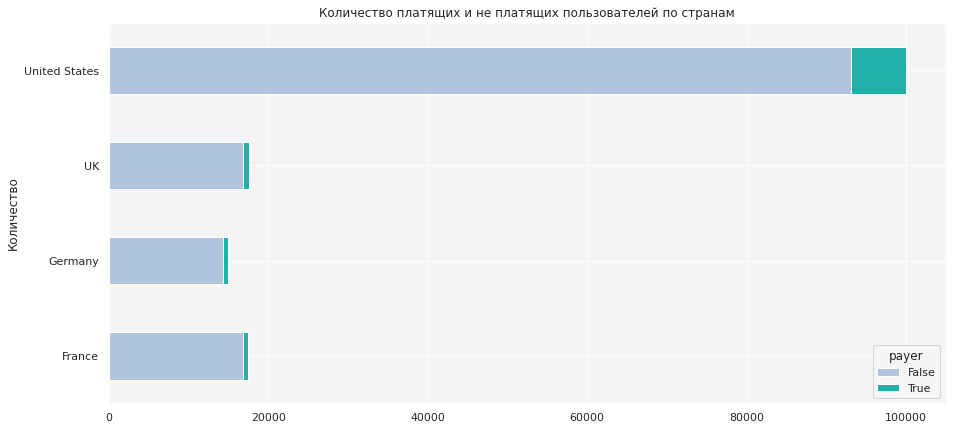

In [27]:
(
profiles
 .pivot_table(
              index='region', 
              values='user_id', 
              aggfunc='count', 
              columns='payer')
 .plot(
       kind='barh', xlabel='Количество', 
       ylabel='Страны', stacked=True, 
       title='Количество платящих и не платящих пользователей по странам',
       color=['#B0C4DE', '#20B2AA'])
)    

In [28]:
(
profiles
 .pivot_table(
              index='region', 
              values='user_id', 
              aggfunc='count', 
              columns='payer')
)    

payer,False,True
region,,
France,16787,663
Germany,14365,616
UK,16875,700
United States,93100,6902


* Вывод

Больше всего пользователей из США, большинство платящих пользователей также из США.

* __Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.__

In [29]:
profiles.head()

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769


<AxesSubplot:title={'center':'Предпочитаемые устройства платящих и не платящих пользователей'}, ylabel='Количество'>

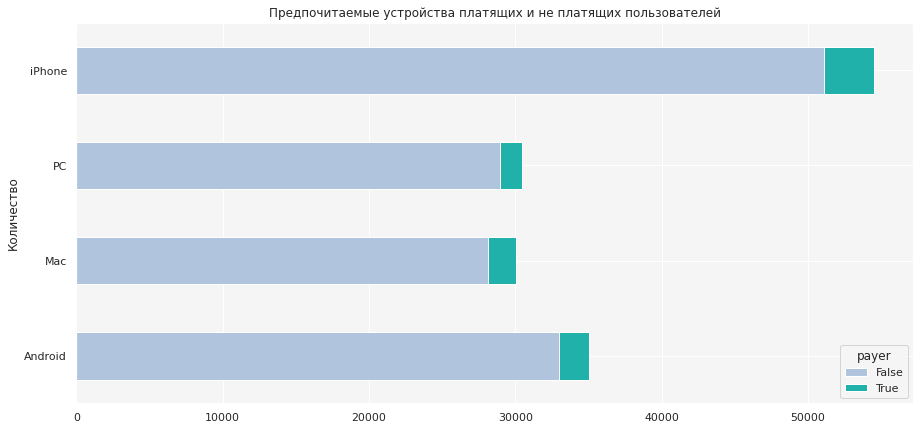

In [30]:
(
profiles
    .pivot_table(
                 index='device', 
                 columns='payer',
                 values='user_id',
                 aggfunc='count')
    .plot(
          kind='barh',
          stacked=True,
          xlabel='Количество',
          ylabel='Устройства',
          title='Предпочитаемые устройства платящих и не платящих пользователей',
          color=['#B0C4DE', '#20B2AA'])
)    

In [31]:
(
profiles
    .pivot_table(
                 index='device', 
                 columns='payer',
                 values='user_id',
                 aggfunc='count')
)    

payer,False,True
device,,
Android,32982,2050
Mac,28130,1912
PC,28918,1537
iPhone,51097,3382


* Вывод

 Устройства iphone являются наиболее распространнёными среди пользователей. 

* __Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.__

In [32]:
pivot_chanel =(
    profiles
    .pivot_table(
        index='channel', 
        values='user_id',
        columns='payer',
        aggfunc='count')
    .rename(columns={True: 'payer', False: 'not_payer'})
    
)    

<AxesSubplot:title={'center':'Количество пользователей по каналам привлченеия'}, ylabel='Количество'>

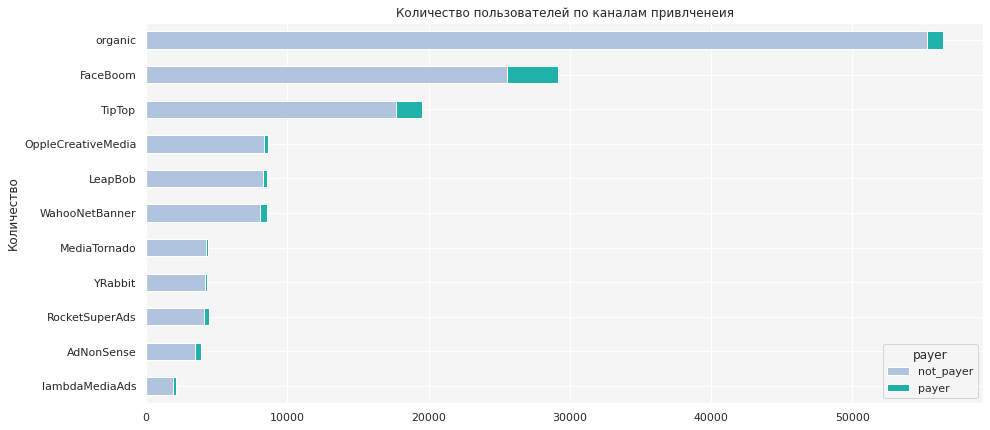

In [33]:
(
pivot_chanel
    .sort_values(by='not_payer', ascending=True)
    .plot(
        kind='barh',
        stacked=True,
        xlabel='Количество',
        ylabel='Канал привлечения',
        title='Количество пользователей по каналам привлченеия',
        color=['#B0C4DE', '#20B2AA'])
)    

In [34]:
pivot_chanel['ratio'] = (pivot_chanel['payer'] / (pivot_chanel['payer'] + pivot_chanel['not_payer'])*100).round(2)

In [35]:
pivot_chanel.sort_values(by='not_payer', ascending=False)

payer,not_payer,payer,ratio
channel,,,
organic,55279,1160,2.06
FaceBoom,25587,3557,12.20
TipTop,17683,1878,9.60
OppleCreativeMedia,8372,233,2.71
LeapBob,8291,262,3.06
WahooNetBanner,8100,453,5.30
MediaTornado,4208,156,3.57
YRabbit,4147,165,3.83
RocketSuperAds,4096,352,7.91


In [36]:
pivot_device =(
    profiles
    .pivot_table(
        index='device', 
        values='user_id',
        columns='payer',
        aggfunc='count')
    .rename(columns={True: 'payer', False: 'not_payer'})
    
)    

In [37]:
pivot_device['ratio'] = (pivot_device['payer'] / (pivot_device['payer'] + pivot_device['not_payer'])*100).round(2)

In [38]:
pivot_device.sort_values(by='not_payer', ascending=False)

payer,not_payer,payer,ratio
device,,,
iPhone,51097,3382,6.21
Android,32982,2050,5.85
PC,28918,1537,5.05
Mac,28130,1912,6.36


In [39]:
pivot_region =(
    profiles
    .pivot_table(
        index='region', 
        values='user_id',
        columns='payer',
        aggfunc='count')
    .rename(columns={True: 'payer', False: 'not_payer'})
    
)    

In [40]:
pivot_region['ratio'] = (pivot_region['payer'] / (pivot_region['payer'] + pivot_region['not_payer'])*100).round(2)

In [41]:
pivot_region.sort_values(by='not_payer', ascending=False)

payer,not_payer,payer,ratio
region,,,
United States,93100,6902,6.90
UK,16875,700,3.98
France,16787,663,3.80
Germany,14365,616,4.11


* Вывод

Больше всего пользуются приложением органические пользователи. Также каналы Tip Top и FaceBoom имеют высокие показатели. По соотношению платящих пользователей лидируют каналы Face Boom, AdNonSense и lambdaMediaAds. 
Среди девайсов лучшее соотношение у пользователей MAC и Iphone а среди регоно лучшее соотношение у США

## Шаг 4. Маркетинг

* __Посчитайте общую сумму расходов на маркетинг.__

In [42]:
(
costs_info
    .pivot_table(
        index='channel', 
        values='costs',
        aggfunc='sum',
        margins=True)
    .sort_values(by='costs', ascending=False)
)    

,costs
channel,
All,105497.30
TipTop,54751.30
FaceBoom,32445.60
WahooNetBanner,5151.00
AdNonSense,3911.25
OppleCreativeMedia,2151.25
RocketSuperAds,1833.00
LeapBob,1797.60
lambdaMediaAds,1557.60


* __Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.__

<AxesSubplot:title={'center':'Сумма затрат на рекламу по источникам'}, ylabel='Сумма затрат'>

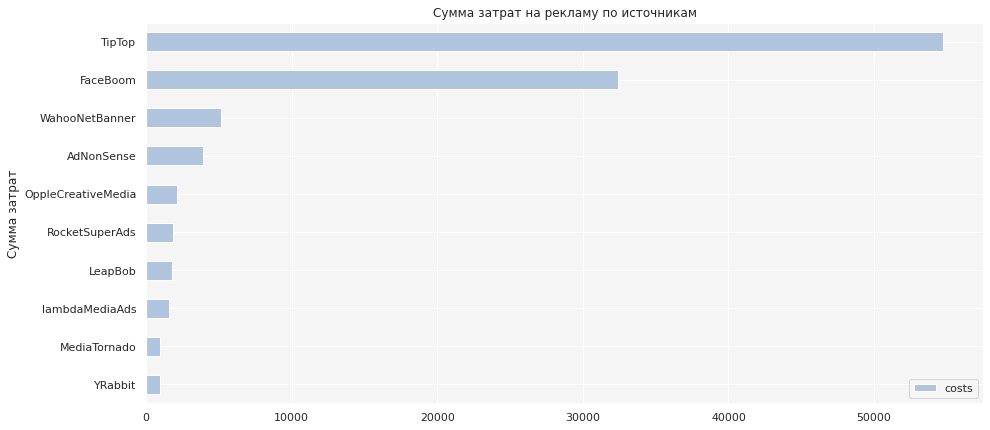

In [43]:
(
costs_info
    .pivot_table(
        index='channel', 
        values='costs',
        aggfunc='sum')
    .sort_values(
        by='costs', 
        ascending=True)
    .plot(
        kind='barh', 
        xlabel='Сумма затрат',
        ylabel='Рекламный источник',
        title='Сумма затрат на рекламу по источникам',
        color='#B0C4DE')
)                       

* Вывод

Самые большие траты идут на Tip Top и Face Boom

* __Постройте визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Постарайтесь отразить это на одном графике.__

In [44]:
costs_info['week'] = pd.DatetimeIndex(costs_info['dt']).week

In [45]:
costs_info['month'] = pd.DatetimeIndex(costs_info['dt']).month

In [46]:
pallete = ['#CD5C5C', '#3CB371', '#FF8C00', '#DA70D6', '#D2691E', '#00FA9A', '#87CEEB', '#4169E1', '#8FBC8F', '#7B68EE']

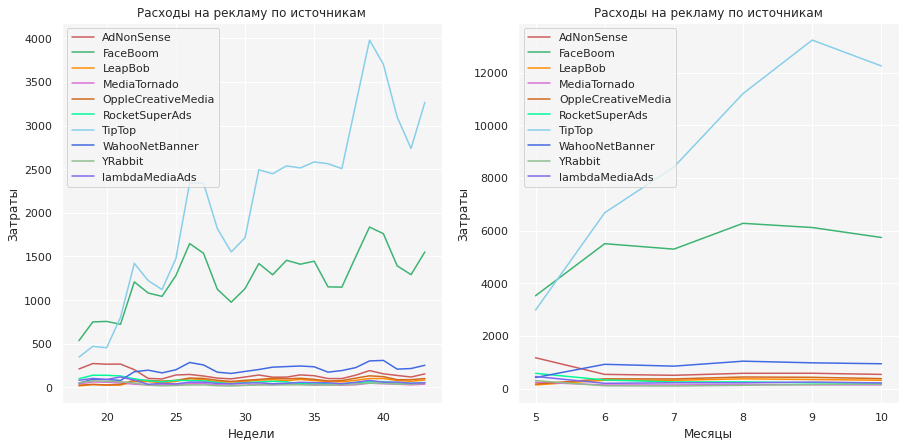

In [47]:
plt.figure(figsize=(15, 7))
ax1 = plt.subplot(1, 2, 1)
(
   costs_info
    .pivot_table(
    index='week',
    values='costs',
    aggfunc='sum',
    columns='channel'
    )
    
).plot(grid=True, ax=ax1, color=pallete)
plt.legend()
plt.xlabel('Недели')
plt.ylabel('Затраты')
plt.title('Расходы на рекламу по источникам')

ax2 = plt.subplot(1, 2, 2)
(
   costs_info
    .pivot_table(
    index='month',
    values='costs',
    aggfunc='sum',
    columns='channel'
    )
    
).plot(grid=True, ax=ax2, color=pallete)
plt.legend()
plt.xlabel('Месяцы')
plt.ylabel('Затраты')
plt.title('Расходы на рекламу по источникам')
plt.show()


* Вывод

Самые большие траты идут на Tip Top и Face Boom. Видны явные просадки в рекламных расходах.

* __Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.__

In [48]:
(
profiles
    .pivot_table(index = 'channel',
                values = 'acquisition_cost',
                aggfunc='mean')
    .sort_values(by='acquisition_cost', ascending=False)
    .rename(columns={'acquisition_cost': 'cac'})
)


,cac
channel,
TipTop,2.799003
FaceBoom,1.113286
AdNonSense,1.008054
lambdaMediaAds,0.724802
WahooNetBanner,0.602245
RocketSuperAds,0.412095
OppleCreativeMedia,0.250000
YRabbit,0.218975
MediaTornado,0.218717


* Вывод

Дороже всего приложению обходится пользователь, которого привлекли просредством TipTop.

## Шаг 5. Оцените окупаемость рекламы

* __Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.__

In [49]:
profiles = profiles.query('channel != "organic"')

__Общая окупаемость__

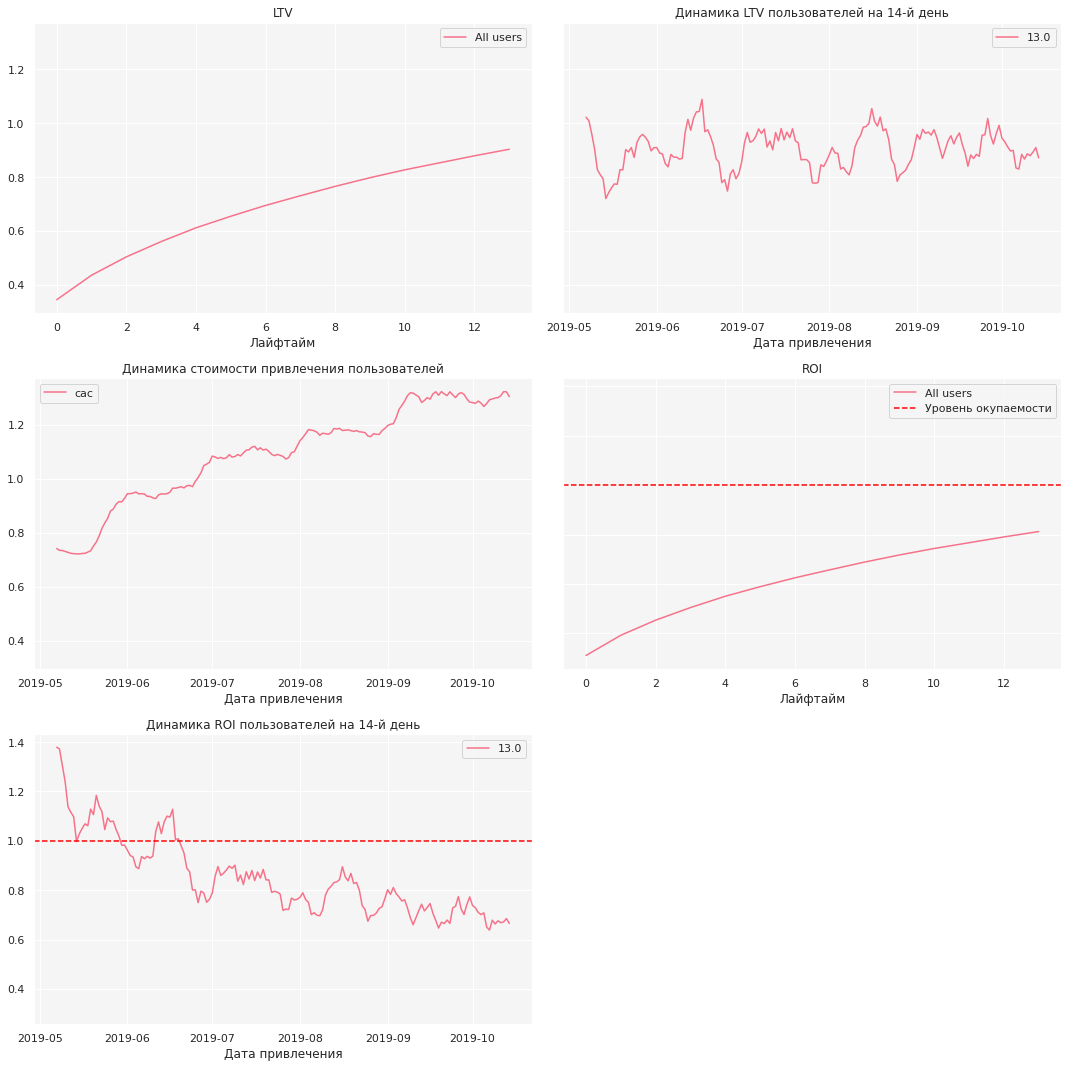

In [50]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon
)

plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon)

* Вывод

Можно заметить что после 14-го дня реклама не окупается, САС растет, значит рекламный бюджет увеличивается, начиная с июня, привлеченные клиенты перестают окупаться в двух-недельном лайфтайме.


__Окупаемость рекламы по странам__

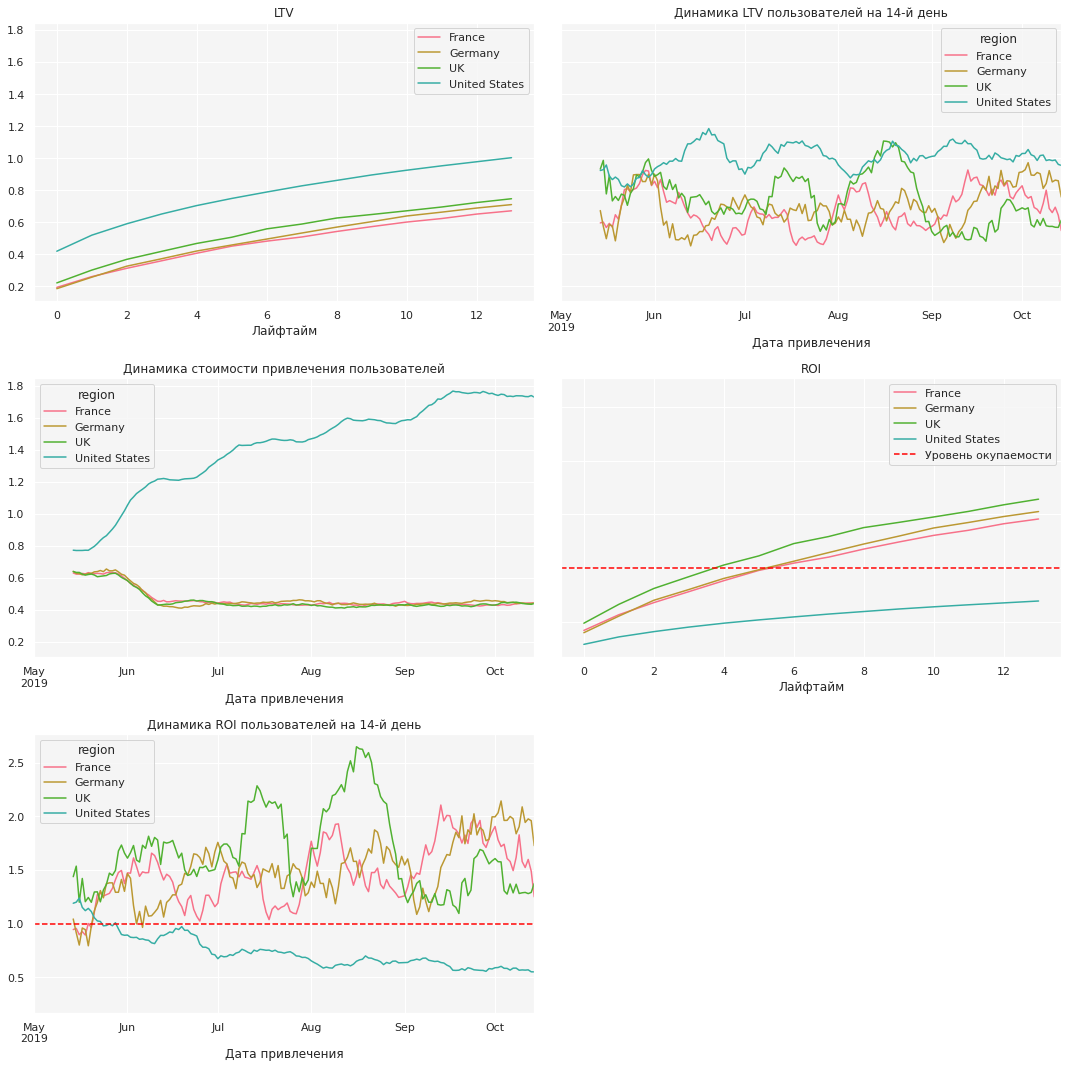

In [51]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

* Вывод

Как выяснилось большую часть пользователей составляют пользователи из США, но как видно для приложения она совсем не эффективные. Они быстро приходят и также быстро уходят из приложения

Рассмотрев затраты на рекламу в Европе, можно сказать, что они стабильно эффективные, а в США затраты на рекламу растут, но они совсем не эффективные.

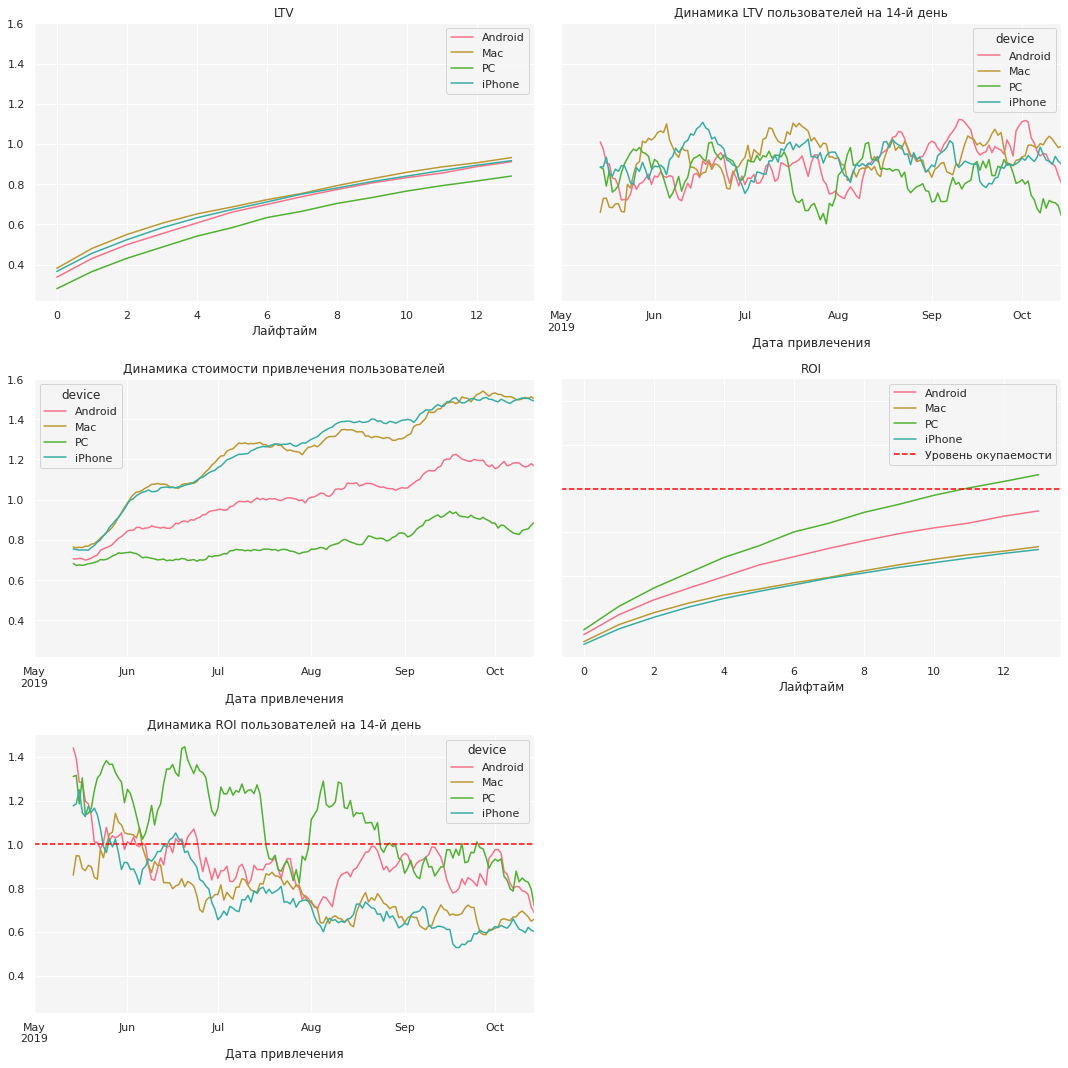

In [52]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

* Вывод

Окупаются только пользователи PC устройств. 

* __Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.__

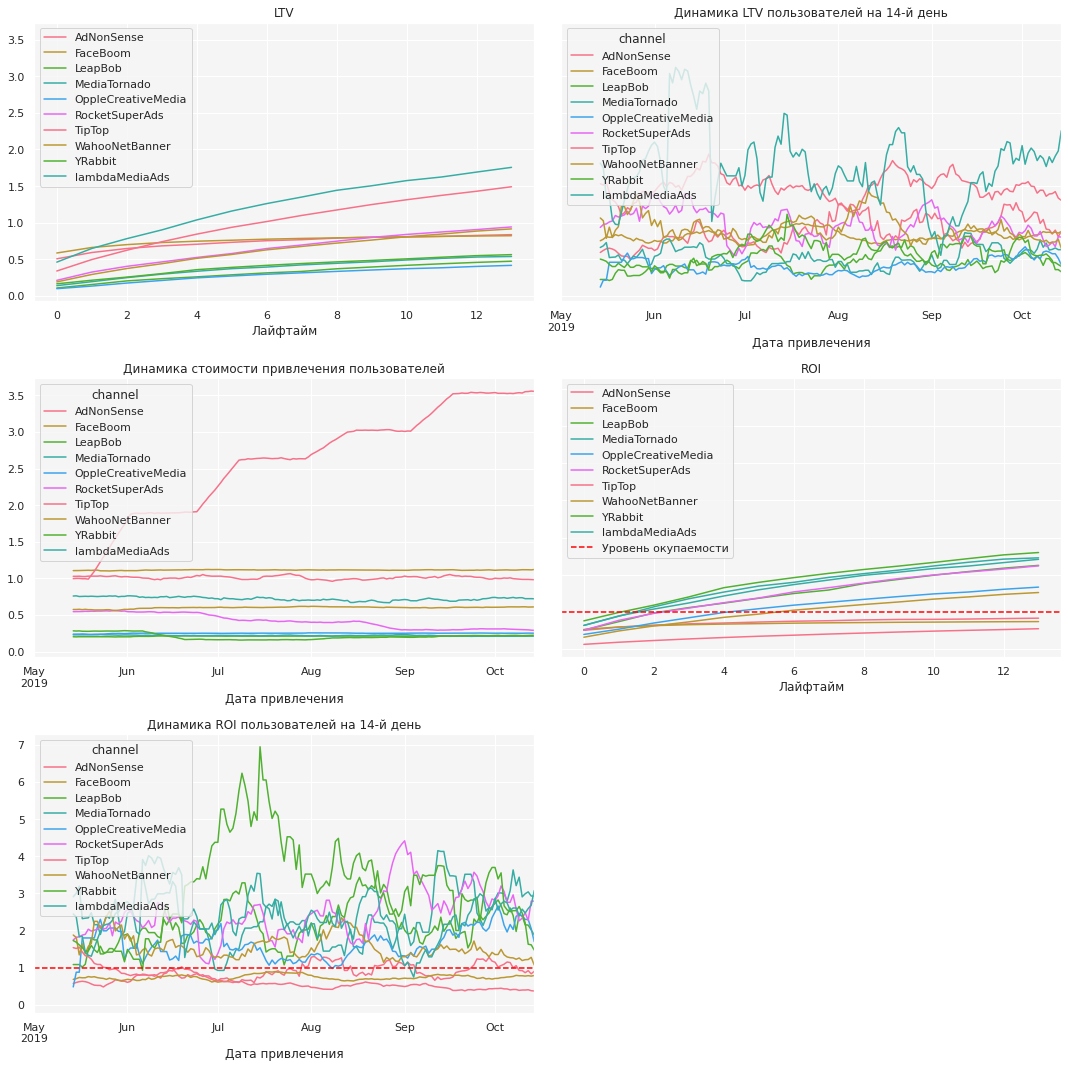

In [53]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, analysis_horizon, window=14
)

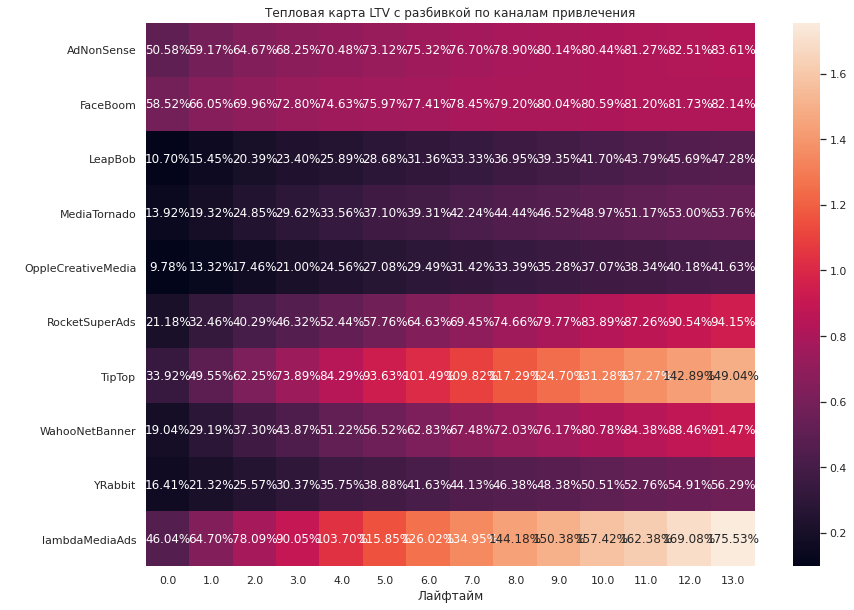

In [54]:
# хитмэп LTV
plt.figure(figsize=(30, 10))

sns.heatmap(
    ltv_grouped.drop(columns = ['cohort_size']), 
    annot=True, 
    fmt='.2%', 
    ax=plt.subplot(1, 2, 2)
            )
plt.title('Тепловая карта LTV с разбивкой по каналам привлечения')
plt.xlabel('Лайфтайм')
plt.ylabel(' ')
plt.show()

* Вывод

На двухнедельном лайфтайме затраты на первую тройку компаний (на которые тратится практически весь рекламный бюджет) - не окупаются,

Затраты на рекламу в TipTop и FaceBoom вообще не окупаются,

С затратами на рекламу TipTop увеличиваются каждый месяц,

Перспективным каналом кажется lambdaMediaAds - низкая стоимость привлечения (0,72)и высокие показатели пожизненнаой ценности клиента.

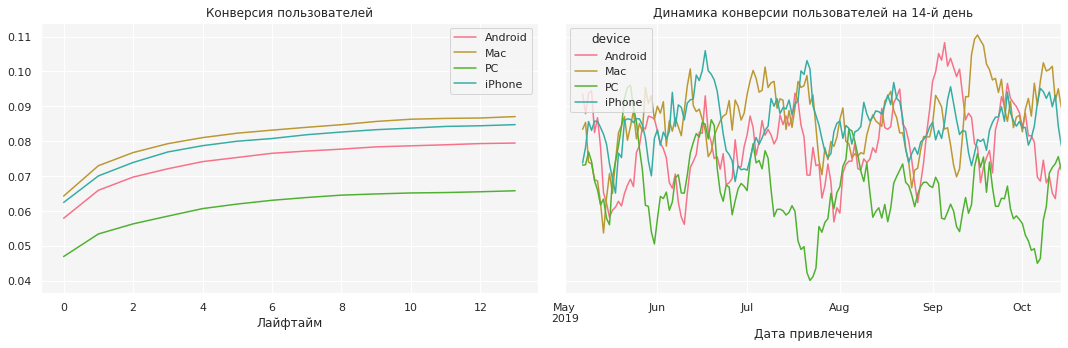

In [55]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

* Вывод

В лидерах  по конверсии устройства appke

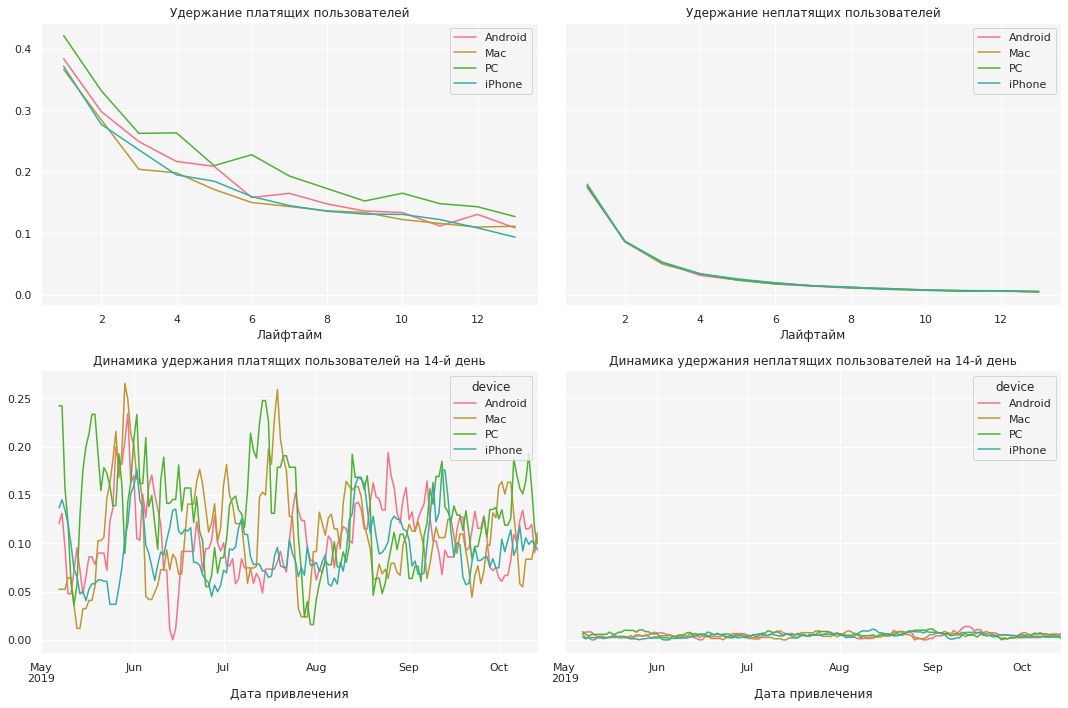

In [56]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

* Вывод

Удержания пользователей в зависимости от устройств не очень сильно отличаются друг от друга, платящие пользователи PC удерживаются чуть лучше.

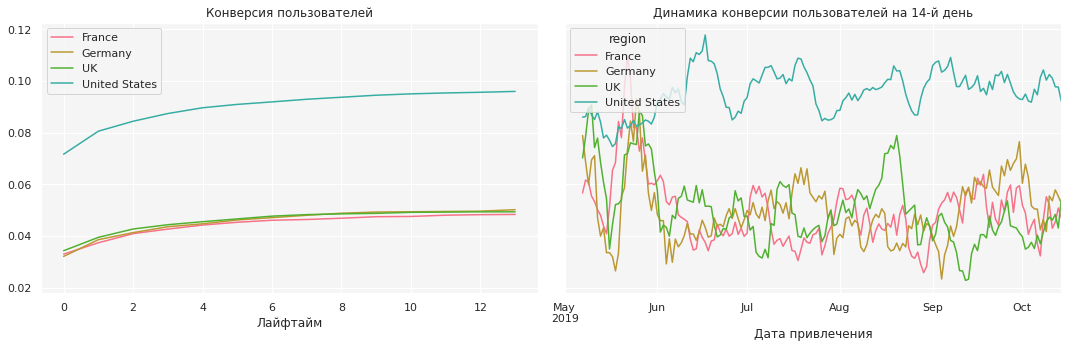

In [57]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

* Вывод

Конверсия пользователей США почти в два раза выше конверсии пользователей других стран.

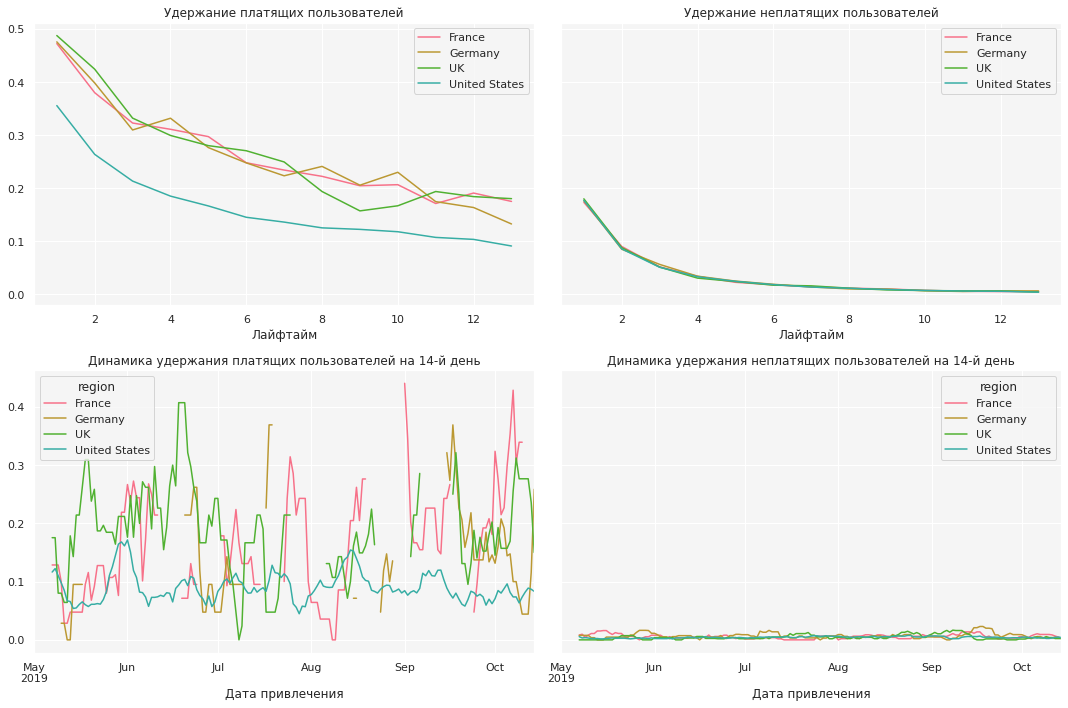

In [58]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

* Вывод 

Удержание платящих пользователей из США намного хуже остальных.  

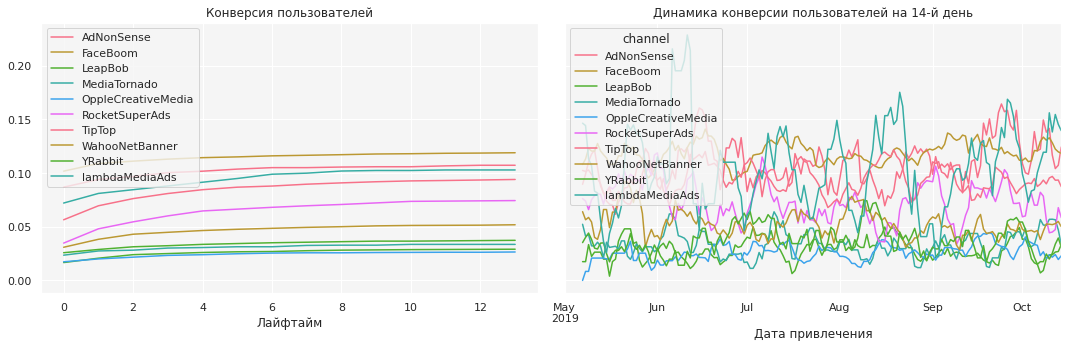

In [59]:
# смотрим конверсию с разбивкой по каналам привлечения
dimensions = ['channel']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, analysis_horizon, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, analysis_horizon)

* Вывод

Выше всего конверсия у пользователей, привлеченных посредством FaceBoom. Но вообще, динамики у всех пользователей в течение двухнедельного лайфтайма практически и нет.

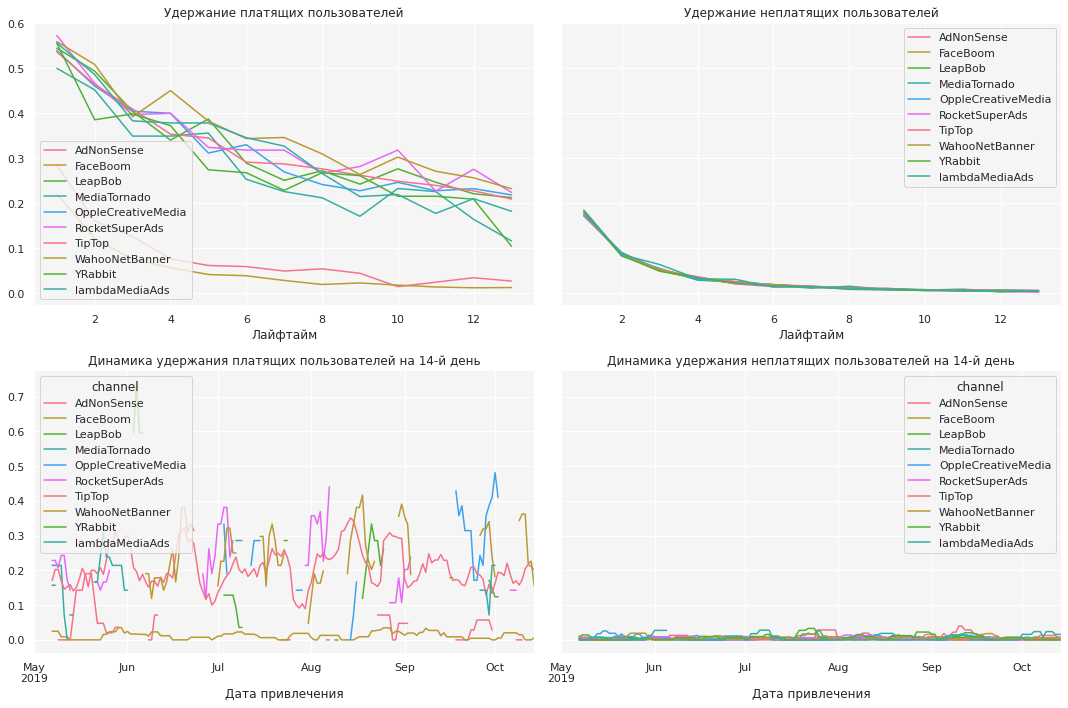

In [60]:
# смотрим удержание с разбивкой по каналам привлечения

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, analysis_horizon, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, analysis_horizon)

* Вывод

Хуже всего из платящих удерживаются пользователи из FaceBoom и AdNonSense.

## Шаг 6. Напишите выводы


В результате исследования было выявлено, что основной причиной проблем являются рекламные траты на привлечение пользователей через каналы FaceBoom, TipTop в США и AdNonSence в Европе.

высокая стоимость привлечения у этих каналов, с горизонтом событий в две недели она не окупается;

при этом, платящие пользователи FaceBoom и AdNonSence очень плохо удерживаются;

расходы на привлечение в TipTop за полгода выросли почти в три раза.

В качестве рекомендаций предлагаем следующие направления:

с учетом того, что подавляющее количество пользователей из США, необходиом проработать отношения с рекламными площадками этого направления:
как вариант, отказаться от FaceBoom и перенаправить рекламные средства в пользу других каналов;

выявить причину роста САС канала TipTop и по возможности устранить ее. Если это невозможно, то отказаться от этой рекламной площадки в пользу других;

достаточно перспективным выглядит RocketSuperAds (низкий САС, неплохое привлечение и удержание, конверсия на уровне);

обратить внимание на европейский рынок, например, увеличить расходы на рекламу в lambdaMediaAds и снизить в AdNonSense;

поработать с органическими пользователями: это существенная доля дохода приложения.